# JSON and APIs

_September 22, 2020_

Agenda today:
- Introduction to API and Remote Server Model 
- Getting data through an API: Case study with YELP API

In [1]:
import pandas as pd
import numpy as np
import requests
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [96]:
mykey = open("no_commit/yelpapi.txt", "r").read() #this is only ran to import my api key for this project!

## Part I. APIs and Remote Server Model
API stands for Application Programming Interface. At some point or the other, large companies would build API for their products for their clients or internal use. It allows the company's application to communicate with another application. But what _exactly_ is an API?

#### Remote server 
When we think about the world of Web, we can think of it as a collection of _servers_. And servers are nothing but huge computers that store a huge amount of data from users and are optimized to process requests. For example, when you type in www.facebook.com, your browser sends a _request_ to the Facebook server, and gets a response from the server, thus interpreting the code and displaying your homepage. 

In this case, your browser is the _client_, and Facebook’s server is an API. To put it broadly, whenever you visit a website, you are interacting with its API. However, an API isn’t the same as the remote server — rather it is the part of the server that receives __requests__ and sends __responses__.

<img src='status-code.png' width = 500>

## Part II. Getting Data Through APIs

The `get()` method send a request to YELP's API, and stored information in a variable called `request`. Next, let's see if it's successful. 

#### YELP API
Sometimes you need _authentication_ to get data from a service in additional to just sending a `GET()` request. Yelp API is a perfect example. 

You will need to go to the YELP's developer's [website](https://www.yelp.com/developers/v3/manage_app) and request for a client ID and API key, which function like a key into a house of data. 

<img src='yelp.png' width = 500>

In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [3]:
# check the status code
response.status_code

# what happened here?

400

In [4]:
# now we are ready to get our data 

# usually, services would limit you to a certain amount of API calls. This varies from service
# to service, so you have to watch out to it 

MY_API_KEY = "mykey"


term = 'Axe Throwing'
location = 'Brooklyn'
SEARCH_LIMIT = 10

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)

In [5]:
# examine the response object

print(response)


<Response [200]>


In [6]:
# how are we going to parse the response.text object?

print(response.text)

{"businesses": [{"id": "X0DNGKUQPjf0AfaXfXU2Qg", "alias": "kick-axe-throwing-brooklyn-2", "name": "Kick Axe Throwing", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/WjKylwrUBKnGIE_ldj142Q/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/kick-axe-throwing-brooklyn-2?adjust_creative=beH78tKnBsJlO3zA-wY_pw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=beH78tKnBsJlO3zA-wY_pw", "review_count": 399, "categories": [{"alias": "bars", "title": "Bars"}, {"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "tradamerican", "title": "American (Traditional)"}], "rating": 4.5, "coordinates": {"latitude": 40.6790268, "longitude": -73.983077}, "transactions": [], "location": {"address1": "622 Degraw St", "address2": null, "address3": "", "city": "Brooklyn", "zip_code": "11217", "country": "US", "state": "NY", "display_address": ["622 Degraw St", "Brooklyn, NY 11217"]}, "phone": "+18335425293", "display_phone": "(833) 542-5293", "distance": 4733.616620

In [7]:
# working with JSON
#json.load = LOADS a file
#json.loads = Loads a long string or values into a json file
axe_throwing = response.text
axe_throwing = json.loads(axe_throwing)

In [8]:
# cleaning and exploring the data
for key in axe_throwing.keys():
    print(key)

businesses
total
region


In [9]:
axe_throwing

{'businesses': [{'id': 'X0DNGKUQPjf0AfaXfXU2Qg',
   'alias': 'kick-axe-throwing-brooklyn-2',
   'name': 'Kick Axe Throwing',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/WjKylwrUBKnGIE_ldj142Q/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/kick-axe-throwing-brooklyn-2?adjust_creative=beH78tKnBsJlO3zA-wY_pw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=beH78tKnBsJlO3zA-wY_pw',
   'review_count': 399,
   'categories': [{'alias': 'bars', 'title': 'Bars'},
    {'alias': 'axethrowing', 'title': 'Axe Throwing'},
    {'alias': 'tradamerican', 'title': 'American (Traditional)'}],
   'rating': 4.5,
   'coordinates': {'latitude': 40.6790268, 'longitude': -73.983077},
   'transactions': [],
   'location': {'address1': '622 Degraw St',
    'address2': None,
    'address3': '',
    'city': 'Brooklyn',
    'zip_code': '11217',
    'country': 'US',
    'state': 'NY',
    'display_address': ['622 Degraw St', 'Brooklyn, NY 11217']},
   'phone': '+

In [11]:
type(axe_throwing)

dict

In [10]:
axe_throwing['businesses'][0]

{'id': 'X0DNGKUQPjf0AfaXfXU2Qg',
 'alias': 'kick-axe-throwing-brooklyn-2',
 'name': 'Kick Axe Throwing',
 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/WjKylwrUBKnGIE_ldj142Q/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/kick-axe-throwing-brooklyn-2?adjust_creative=beH78tKnBsJlO3zA-wY_pw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=beH78tKnBsJlO3zA-wY_pw',
 'review_count': 399,
 'categories': [{'alias': 'bars', 'title': 'Bars'},
  {'alias': 'axethrowing', 'title': 'Axe Throwing'},
  {'alias': 'tradamerican', 'title': 'American (Traditional)'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.6790268, 'longitude': -73.983077},
 'transactions': [],
 'location': {'address1': '622 Degraw St',
  'address2': None,
  'address3': '',
  'city': 'Brooklyn',
  'zip_code': '11217',
  'country': 'US',
  'state': 'NY',
  'display_address': ['622 Degraw St', 'Brooklyn, NY 11217']},
 'phone': '+18335425293',
 'display_phone': '(833) 542-5293',
 'distan

In [12]:
axe_throwing["businesses"][0].keys()

dict_keys(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count', 'categories', 'rating', 'coordinates', 'transactions', 'location', 'phone', 'display_phone', 'distance'])

In [22]:
# turn the relevant dataset into a dataframe

axe_throwing_df = pd.DataFrame.from_dict(axe_throwing["businesses"])
axe_throwing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
id               10 non-null object
alias            10 non-null object
name             10 non-null object
image_url        10 non-null object
is_closed        10 non-null bool
url              10 non-null object
review_count     10 non-null int64
categories       10 non-null object
rating           10 non-null float64
coordinates      10 non-null object
transactions     10 non-null object
location         10 non-null object
phone            10 non-null object
display_phone    10 non-null object
distance         10 non-null float64
dtypes: bool(1), float64(2), int64(1), object(11)
memory usage: 1.2+ KB


In [23]:
axe_throwing_df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance
0,X0DNGKUQPjf0AfaXfXU2Qg,kick-axe-throwing-brooklyn-2,Kick Axe Throwing,https://s3-media1.fl.yelpcdn.com/bphoto/WjKylw...,False,https://www.yelp.com/biz/kick-axe-throwing-bro...,399,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.5,"{'latitude': 40.6790268, 'longitude': -73.983077}",[],"{'address1': '622 Degraw St', 'address2': None...",+18335425293,(833) 542-5293,4733.616620
1,4E6BkrEVf_0TjRVYE7gxeQ,bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2,Bury the Hatchet Brooklyn - Axe Throwing,https://s3-media3.fl.yelpcdn.com/bphoto/SH8_Nw...,False,https://www.yelp.com/biz/bury-the-hatchet-broo...,143,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...",4.5,"{'latitude': 40.7283195, 'longitude': -73.9600...",[],"{'address1': '25 Noble St', 'address2': None, ...",+19172439696,(917) 243-9696,8652.979400
2,PhEkSzYZHKYS7uyXePmkMw,axes-and-arrows-long-island-city-2,Axes And Arrows,https://s3-media4.fl.yelpcdn.com/bphoto/Uinh_o...,False,https://www.yelp.com/biz/axes-and-arrows-long-...,49,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...",4.5,"{'latitude': 40.7425127, 'longitude': -73.933816}",[],"{'address1': '47- 11 Van Dam St', 'address2': ...",+17183619152,(718) 361-9152,9996.588059
3,lZVE27r_W_3GXxNwECYC4g,live-axe-new-york,Live Axe,https://s3-media2.fl.yelpcdn.com/bphoto/-Z1qvn...,False,https://www.yelp.com/biz/live-axe-new-york?adj...,2,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...",5.0,"{'latitude': 40.71769, 'longitude': -74.00144}",[],"{'address1': '96 Lafayette St', 'address2': No...",+18888129060,(888) 812-9060,8955.976102
4,b9DAbR-1eIfLr6TPI_r59Q,axe-kicking-entertainment-mineola,Axe Kicking Entertainment,https://s3-media3.fl.yelpcdn.com/bphoto/stIBBa...,False,https://www.yelp.com/biz/axe-kicking-entertain...,2,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...",5.0,"{'latitude': 40.74638, 'longitude': -73.65027}",[],"{'address1': '360 Jericho Turnpike', 'address2...",+15162806040,(516) 280-6040,26518.825160


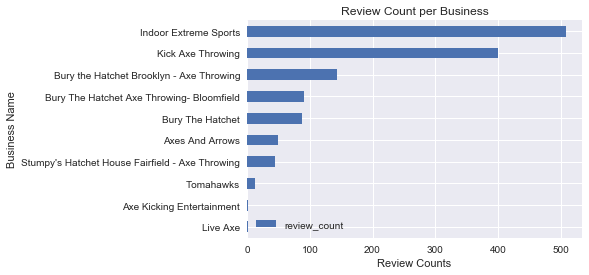

In [73]:
# you can do some analysis and visualization from here on! 

# visualize the review count - what's the appropriate plot?
axe_throwing_df[["name", "review_count"]].set_index("name").sort_values("review_count", ascending = True).plot(kind = "barh");
plt.title("Review Count per Business");
plt.xlabel("Review Counts");
plt.ylabel("Business Name");

In [105]:
# query the name of the axe throwing place with the highest review
axe_throwing_df[["name", "review_count"]].sort_values("review_count", ascending = True)["name"][0]

'Kick Axe Throwing'

In [106]:
import sqlite3
conn = sqlite3.connect("yelp_tutorial.db")
cur = conn.cursor()

In [114]:
# migrate the cleaned data into a sql db
axe_throwing_df.to_sql("axethrowbklyn", conn)

ValueError: Table 'axethrowbklyn' already exists.

In [ ]:
# can you do some other queries using sql/pandas?

In [ ]:
# homework - query something between on yelp. do one visualization, 
# send it to Fangfang

#### Resources
- [Getting Data from Reddit API](https://www.storybench.org/how-to-scrape-reddit-with-python/)
- [Twitch API](https://dev.twitch.tv/docs)